## Assignment

1. Explore Linear Disciminant Analysis (LDA) by visiting the website of Scikit Learn.
2. Use LDA to classify wines using wines using wine dataset as training data.
3. Carryout the comparative analysis of different classification methods for classfying wine in to one of the three categories

## LDA for wine data

In [1]:
import numpy as np
import matplotlib.pyplot as plt


from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn import datasets
wine = datasets.load_wine()

X = wine.data
y = wine.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state = 128546 )

LDA = LinearDiscriminantAnalysis()
LDA.fit(X_train, y_train)
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [2]:
from sklearn import metrics
y_pred = LDA.predict(X_test)
print('Accuracy = %0.4f'%np.mean(y_pred == y_test))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(y_test, y_pred))

Accuracy = 0.9831
Confusion matrix:
[[17  0  0]
 [ 0 26  1]
 [ 0  0 15]]


In [3]:
LDA.score(X_test, y_test)

0.9830508474576272

## Comparative analysis using Decision tree classification method for wine data

In [4]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets, tree   # The tree module contains Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

wine = datasets.load_wine()

X = wine.data
y = wine.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state = 128546 )

DTree = DecisionTreeClassifier(max_depth=3)
DTree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

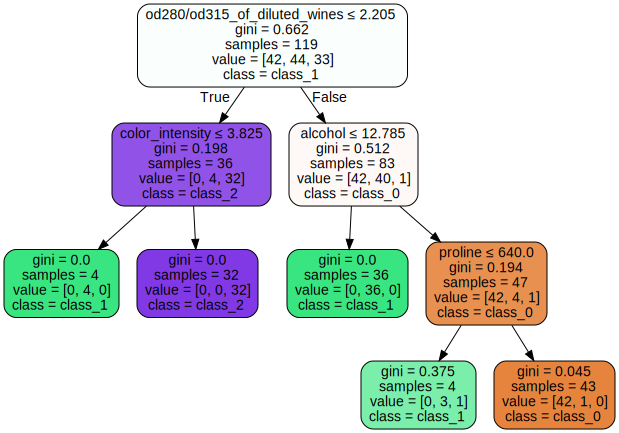

In [5]:
import graphviz 
dot_data = tree.export_graphviz(DTree, out_file=None, 
                         feature_names=wine.feature_names,  
                         class_names=wine.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True) 
graph = graphviz.Source(dot_data) 
graph

In [6]:
y_pred = DTree.predict(X_test)
print('Accuracy = %0.4f'%np.mean(y_pred == y_test))

Accuracy = 0.9492


## Using Multinomial Logistic Regression

In [7]:
import matplotlib.pyplot as plt

# Load the wine dataset from datasets module
from sklearn import datasets
wine = datasets.load_wine()

In [8]:
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [9]:
X = wine.data
Y = wine.target
print(X.shape)
print(Y.shape)

(178, 13)
(178,)


In [10]:
print("Feature Set:\n",X[0])
print("Output: ", Y[0])

Feature Set:
 [1.423e+01 1.710e+00 2.430e+00 1.560e+01 1.270e+02 2.800e+00 3.060e+00
 2.800e-01 2.290e+00 5.640e+00 1.040e+00 3.920e+00 1.065e+03]
Output:  0


In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, 
                                                    test_size=0.33, 
                                                    random_state = 128546 )
from sklearn.linear_model import LogisticRegression
# The instantiation given below uses the default solver lbfgs, recommended for small datasets
LogReg = LogisticRegression(multi_class = "multinomial", penalty="none") 
LogReg.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(multi_class='multinomial', penalty='none')

In [12]:
from sklearn import metrics
import numpy as np
y_pred = LogReg.predict(X_test)
print('Accuracy = %0.4f'%np.mean(y_pred == y_test))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(y_test, y_pred))

Accuracy = 0.9153
Confusion matrix:
[[17  0  0]
 [ 0 23  4]
 [ 0  1 14]]
